Import pandas, numpy, pyplot, and seaborn.

In [1]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read in the GDP dataset and look at the first few rows.

In [2]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
print(gdp_df.head())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2021  1517.016266              NaN
1     Afghanistan  2020  1968.341002              NaN
2     Afghanistan  2019  2079.921861              NaN
3     Afghanistan  2018  2060.698973              NaN
4     Afghanistan  2017  2096.093111              NaN


How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB
None


Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [4]:
del gdp_df['Value Footnotes']
gdp_df.rename(columns = {'Country or Area':'Country', 'Value':'GDP_Per_Capita'}, inplace = True)
print(gdp_df.head())

       Country  Year  GDP_Per_Capita
0  Afghanistan  2021     1517.016266
1  Afghanistan  2020     1968.341002
2  Afghanistan  2019     2079.921861
3  Afghanistan  2018     2060.698973
4  Afghanistan  2017     2096.093111


How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [5]:
unique_years = pd.DataFrame(gdp_df.groupby(['Country'])['Year'].count())
unique_years.reset_index(inplace=True)
print(unique_years[unique_years['Year']==33])
print(unique_years[unique_years['Year']!=33])

                         Country  Year
1    Africa Eastern and Southern    33
2     Africa Western and Central    33
3                        Albania    33
4                        Algeria    33
5                         Angola    33
..                           ...   ...
236                      Vanuatu    33
237                     Viet Nam    33
239                        World    33
240                       Zambia    33
241                     Zimbabwe    33

[202 rows x 2 columns]
                       Country  Year
0                  Afghanistan    20
10                       Aruba    32
22                      Bhutan    32
24      Bosnia and Herzegovina    29
32                    Cambodia    30
36              Cayman Islands    16
46                     Croatia    28
47                    CuraÃ§ao    22
53                    Djibouti    10
64                     Estonia    28
91                     Hungary    32
97                     Iceland    28
103                     Isr

In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [6]:
gdp_2020 = gdp_df[gdp_df['Year']==2020]

C:\Users\chabi\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


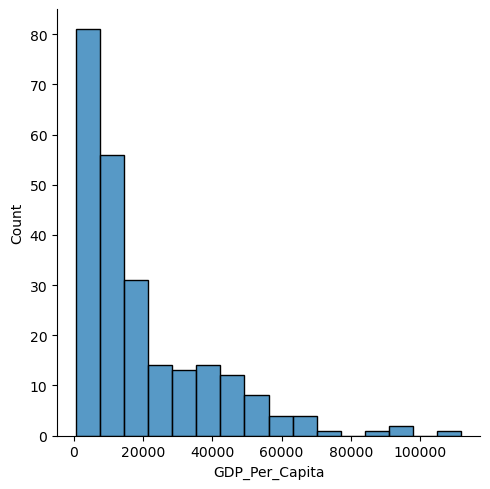

In [7]:
#histogram
sns.displot(x=gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='GDP_Per_Capita', ylabel='Density'>

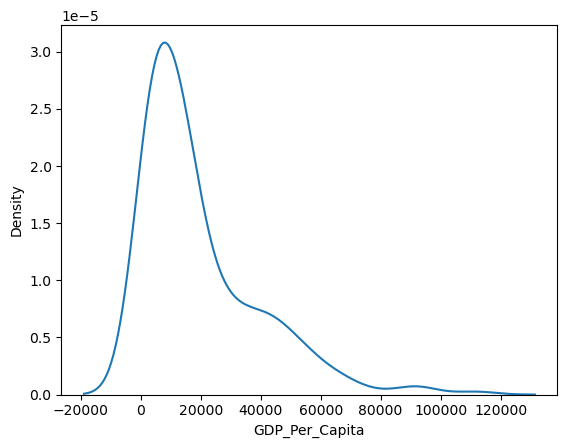

In [8]:
#densityplot
sns.kdeplot(gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

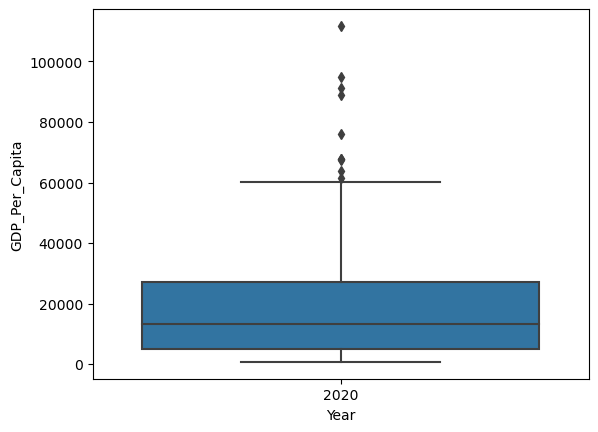

In [9]:
#boxplot
sns.boxplot(x=gdp_2020['Year'], y=gdp_2020['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

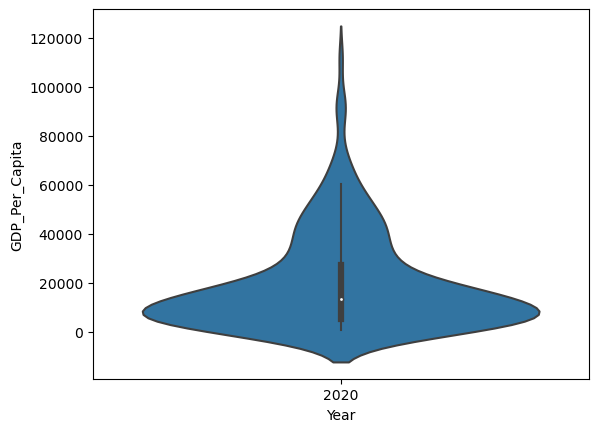

In [10]:
#violinplot
sns.violinplot(x=gdp_2020['Year'], y=gdp_2020['GDP_Per_Capita'])

The majority of countries appear to have a GDP per capita somewhere in the realm of $10,000, with a very small subset having a GDP per capita greater than $60,000. Interestingly, there are also some negative values.
As for chart types, while the histogram and density plots probably look more familiar to most people, I think the violin plot does the best job of illustrating that the distribution of GDP is skewed toward the bottom of the range. I don't think a box plot would be the best choice to answer this question because it just presents everything as an outlier, and that's not really the point here.

What was the median GDP per capita value in 2020?

In [11]:
median_gdp_2020 = gdp_2020['GDP_Per_Capita'].agg('median')
print(median_gdp_2020)

13357.997573370474


$13.358.00

For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

In [12]:
gdp_decades = gdp_df[gdp_df['Year'].isin([1990, 2000, 2010, 2020])]

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

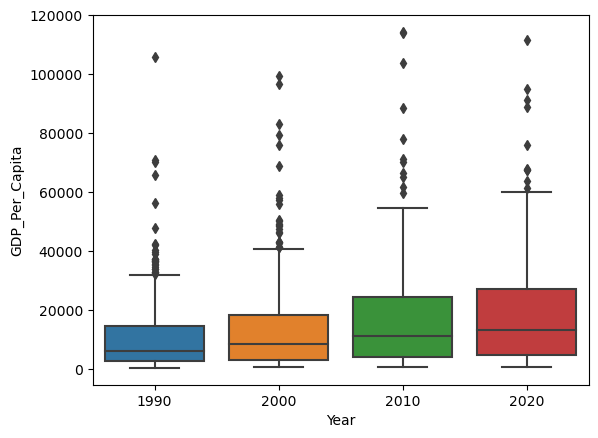

In [13]:
#boxplot
sns.boxplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'])

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

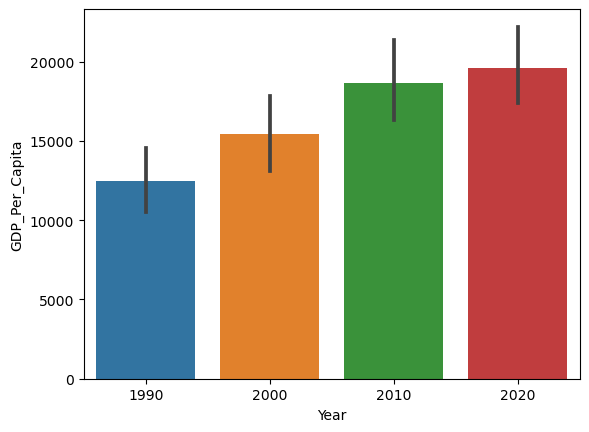

In [14]:
#barplot
sns.barplot(x='Year', y='GDP_Per_Capita', data=gdp_decades)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

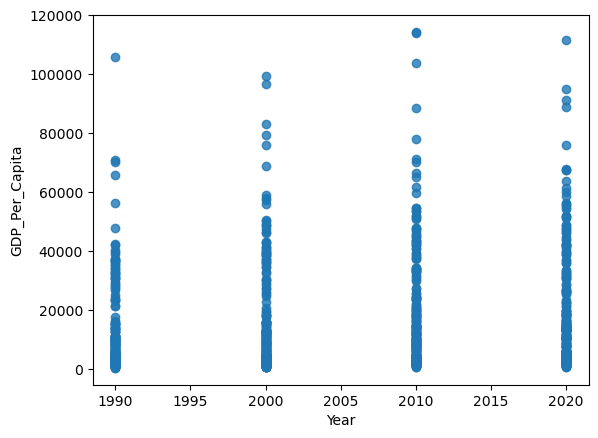

In [15]:
#scatterplot
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], fit_reg=False)

<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

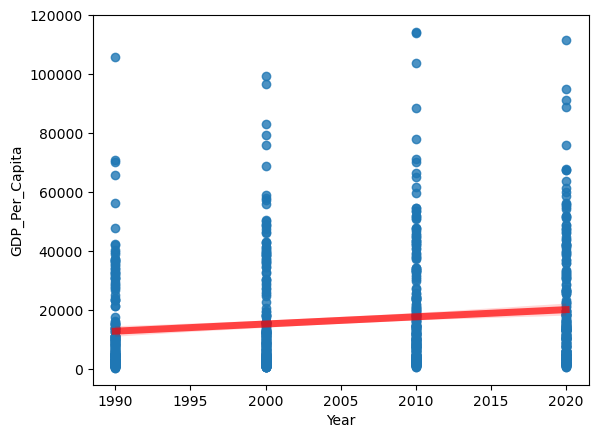

In [16]:
#scatterplot with trend line
sns.regplot(x=gdp_decades['Year'], y=gdp_decades['GDP_Per_Capita'], line_kws={"color":"r","alpha":0.7,"lw":5})

Generally, GDP per capita has increased over time. This is most evident in either the bar plot or the trend line on teh scatter plot, although a scatter plot is probably not an appropriate choice to illustrate this data.

Which country was the first to have a GDP per capita greater than $100,000?

In [17]:
gdp_100k = gdp_df[gdp_df['GDP_Per_Capita']>=100000]
gdp_first_to_100k = gdp_100k[gdp_100k['Year'] == gdp_100k['Year'].agg('min')]
print(gdp_first_to_100k)

                   Country  Year  GDP_Per_Capita
7302  United Arab Emirates  1990   105893.626059


The UAE first reached $100,000 GDP per capita in 1990.

Which country had the highest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [18]:
# First, find the highest GDP per capita in 2020.
max_gdp_2020 = gdp_2020[gdp_2020['GDP_Per_Capita'] == gdp_2020['GDP_Per_Capita'].agg('max')]
print(max_gdp_2020)

         Country  Year  GDP_Per_Capita
4148  Luxembourg  2020   111751.314751


<Axes: xlabel='Year'>

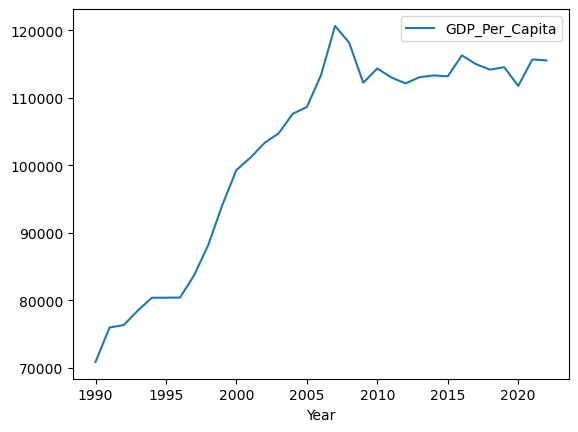

In [19]:
# It's Luxembourg. Now plot GDP per capita over time for Luxembourg.
gdp_lx = gdp_df[gdp_df['Country'] == 'Luxembourg']
gdp_lx.plot.line('Year', 'GDP_Per_Capita')

Which country had the lowest GDP per capita in 2020? Create a plot showing how this country's GDP per capita has changed over the timespan of the dataset.

In [20]:
# First, find the lowest GDP per capita in 2020.
min_gdp_2020 = gdp_2020[gdp_2020['GDP_Per_Capita'] == gdp_2020['GDP_Per_Capita'].agg('min')]
print(min_gdp_2020)

     Country  Year  GDP_Per_Capita
973  Burundi  2020      711.355263


<Axes: xlabel='Year'>

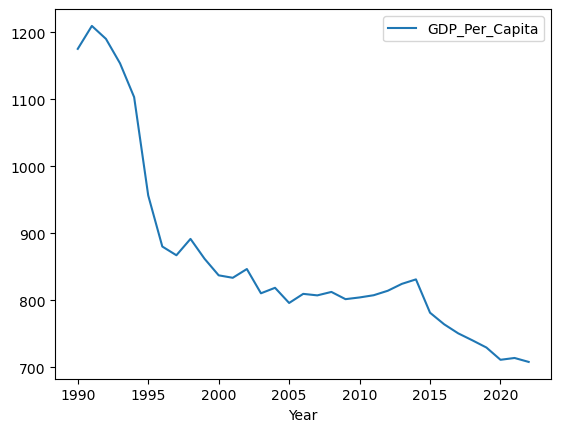

In [21]:
# It's Burundi. Now plot GDP per capita over time for Burundi.
gdp_br = gdp_df[gdp_df['Country'] == 'Burundi']
gdp_br.plot.line('Year', 'GDP_Per_Capita')

Read in the internet use dataset into a DataFrame named `internet_df`. You will likely get errors when doing this. Check the arguments for the read_csv function to find ones that can help correct the errors (https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) Once you are able to read it in, take per a look at the top and bottom few rows to make sure that it has been read in correctly. Also, check the datatypes of the columns.

In [22]:
internet_df = pd.read_csv('../data/internet_use.csv', nrows = 4495)
print(internet_df)
internet_df.info()

     Country or Area  Year     Value  Value Footnotes
0        Afghanistan  2014  6.390000              NaN
1        Afghanistan  2013  5.900000              NaN
2        Afghanistan  2012  5.454545              NaN
3        Afghanistan  2011  5.000000              NaN
4        Afghanistan  2010  4.000000              NaN
...              ...   ...       ...              ...
4490        Zimbabwe  1997  0.033080              NaN
4491        Zimbabwe  1996  0.016790              NaN
4492        Zimbabwe  1995  0.007684              NaN
4493        Zimbabwe  1994  0.001739              NaN
4494        Zimbabwe  1990  0.000000              NaN

[4495 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  4495 non-null   object 
 1   Year             4495 non-null   int64  
 2   Value            4495 non-null  

Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'Internet_Users_Pct'.

In [23]:
del internet_df['Value Footnotes']
internet_df.rename(columns = {'Country or Area':'Country', 'Value':'Internet_Users_Pct'}, inplace = True)
print(internet_df.head())

       Country  Year  Internet_Users_Pct
0  Afghanistan  2014            6.390000
1  Afghanistan  2013            5.900000
2  Afghanistan  2012            5.454545
3  Afghanistan  2011            5.000000
4  Afghanistan  2010            4.000000


Look at the number of observations in this dataset per year. What do you notice?

In [24]:
yearly_observations= internet_df['Year'].value_counts(sort=False)
print(yearly_observations)

Year
2014    202
2013    202
2012    203
2011    207
2010    203
2009    203
2008    204
2007    206
2006    200
2005    201
2004    199
2003    196
2002    202
2001    201
1990    210
2000    199
1999    198
1998    190
1997    184
1996    175
1995    138
1994     91
1993     65
1992     50
1991     39
1989      8
1988      7
1987      7
1986      7
1985      7
1984      7
1983      7
1982      7
1981      7
1980      7
1979      7
1978      7
1977      7
1976      7
1975      7
1970      7
1965      7
1960      7
Name: count, dtype: int64


The number of observations increases sharply through the 90s and remains  stable after the new millenium.

What is the first year to have a non-zero internet users percentage value?

In [25]:
nonzero_internet_observation = internet_df[internet_df['Internet_Users_Pct']>0]
first_internet_observation = nonzero_internet_observation[nonzero_internet_observation['Year'] == nonzero_internet_observation['Year'].agg('min')]
print(first_internet_observation)

              Country  Year  Internet_Users_Pct
204         Australia  1990            0.585095
229           Austria  1990            0.130369
375           Belgium  1990            0.001007
728            Canada  1990            0.361000
1107          Denmark  1990            0.097277
1388          Finland  1990            0.401088
1413           France  1990            0.052778
1535          Germany  1990            0.125892
2023           Israel  1990            0.110774
2048            Italy  1990            0.017545
2095            Japan  1990            0.020294
2217  Korea (Rep. of)  1990            0.023265
2904      Netherlands  1990            0.334387
3040           Norway  1990            0.707299
3720            Spain  1990            0.012874
3849           Sweden  1990            0.584192
3874      Switzerland  1990            0.595714
4276   United Kingdom  1990            0.087355
4301    United States  1990            0.784729


The first non-zero internet users percentage was recorded in 1990.

How does the distribution of internet users percent differ for 2000 and 2014?

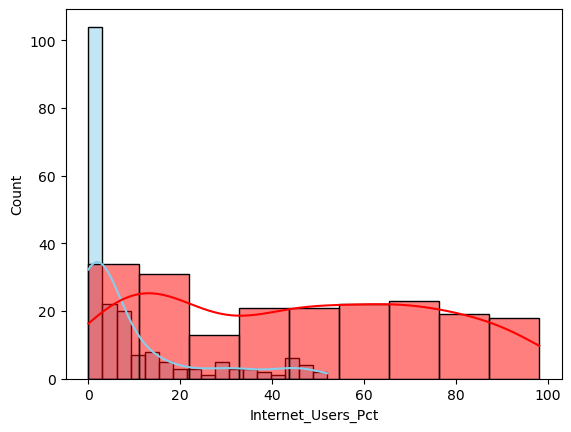

In [26]:
internet_2000 = internet_df[internet_df['Year'] == 2000]
internet_2014 = internet_df[internet_df['Year'] == 2014]
sns.histplot(data=internet_2000, x="Internet_Users_Pct", color="skyblue", label="Internet Use 2000", kde=True)
sns.histplot(data=internet_2014, x="Internet_Users_Pct", color="red", label="Internet Use 2014", kde=True)
plt.show()

A large majority of countries saw little to no internet use in 2000, with the highest usage percentages in that year topping out at below 60%. By 2014, internet usage had become much more widespread, with a much more even distribution across all percentages.

For how many countries was the percentage of internet users below 5% in 2014?

In [27]:
under_5pct_usage_2014 = internet_2014[internet_2014['Internet_Users_Pct'] < 5.0].count()
print(under_5pct_usage_2014)

Country               16
Year                  16
Internet_Users_Pct    16
dtype: int64


In 2014, the percentage of internet users was below 5% in 16 countries.

Merge the two DataFrames to one. Do this in a way that keeps **all rows** from each of the two DataFrames. Call the new DataFrame `gdp_and_internet_use`. Look at the first and last few rows to confirm that it merged correctly.

In [38]:
gdp_and_internet_use = pd.merge(gdp_df, internet_df, how='left')
print(gdp_and_internet_use[gdp_and_internet_use['Year']==2014])

                          Country  Year  GDP_Per_Capita  Internet_Users_Pct
7                     Afghanistan  2014     2144.449634                6.39
28    Africa Eastern and Southern  2014     3642.875373                 NaN
61     Africa Western and Central  2014     4146.994622                 NaN
94                        Albania  2014    11586.817446               60.10
127                       Algeria  2014    11561.259795               18.09
...                           ...   ...             ...                 ...
7509                     Viet Nam  2014     7641.909252               48.31
7542           West Bank and Gaza  2014     5967.073437                 NaN
7571                        World  2014    15120.730322                 NaN
7604                       Zambia  2014     3375.941270               17.34
7637                     Zimbabwe  2014     2316.954536               19.89

[242 rows x 4 columns]
